In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

           Unnamed: 0      open      high     low     close  volume  \
0 2017-12-20 14:30:00  118.6600  118.7100  118.66  118.7000   43248   
1 2017-12-20 14:45:00  118.9500  119.1200  117.56  117.8200   69261   
2 2017-12-20 15:00:00  117.8200  118.3200  117.77  118.2300  163492   
3 2017-12-20 15:15:00  118.2200  118.4200  118.09  118.1800   49993   
4 2017-12-20 15:30:00  118.1800  118.2452  118.06  118.2400   40796   
5 2017-12-20 15:45:00  118.2400  118.2500  118.00  118.1000   43877   
6 2017-12-20 16:00:00  118.1300  118.2400  118.05  118.1200   41672   
7 2017-12-20 16:15:00  118.1101  118.2100  118.06  118.0600   32619   
8 2017-12-20 16:30:00  118.0874  118.1400  117.92  118.0899   28223   
9 2017-12-20 16:45:00  118.0900  118.0900  117.93  118.0500   31569   

   close_2_sma  close_4_sma  close_6_sma  close_8_sma    ...          rs_8  \
0    118.70000   118.700000   118.700000   118.700000    ...           NaN   
1    118.26000   118.260000   118.260000   118.260000    ...  

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=print(len(x[0]))
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u

Working on... AAPL
151
103
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.6371911573472042
G-score: 0.3567281757661233
Accuracy 0.5061946902654867
Window: 140
[[ 82 424]
 [134 490]]
Vol pos 3.9979869819505574
Vol neg 2.3295517355310893


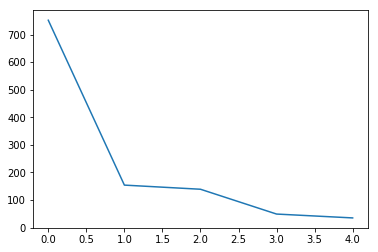

Real Percentage of gain: 8.229739796746061
Percentage of gain: 0.873414765707408
Total gain: 986.958685249371
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 26 352]
 [ 79 296]]
0.42762284196547146
Percentile:  1
[[19 49]
 [ 9 75]]
0.618421052631579
Percentile:  2
[[37 23]
 [31 48]]
0.6115107913669064
Percentile:  3
[[ 0  0]
 [12 37]]
0.7551020408163265
Percentile:  4
[[ 0  0]
 [ 3 32]]
0.9142857142857143
000000000000000000000000000000000000000000000000
Working on... AMZN
151
100
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.31692032229185313
G-score: 0.39202379863411907
Accuracy 0.32597173144876324
Window: 140
[[192  59]
 [704 177]]
Vol pos 2.3899122629987612
Vol neg 2.349899192599403


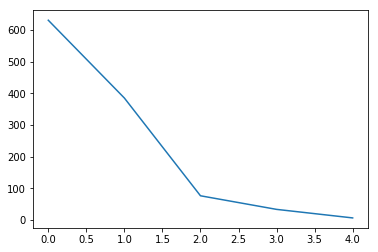

Real Percentage of gain: -153.0226908424458
Percentage of gain: -0.8048546456773864
Total gain: -911.0954589068014
000000000000000000000000000000000000000000000000
Percentile:  0
[[183  16]
 [382  49]]
0.3682539682539683
Percentile:  1
[[  9  27]
 [268  81]]
0.23376623376623376
Percentile:  2
[[ 0 16]
 [42 18]]
0.23684210526315788
Percentile:  3
[[ 0  0]
 [10 23]]
0.696969696969697
Percentile:  4
[[0 0]
 [2 4]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
151
105
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.8769230769230769
G-score: 0.7742926077305564
Accuracy 0.8033794162826421
Window: 140
[[ 67  24]
 [104 456]]
Vol pos 2.28996718113414
Vol neg 1.2342113026377954


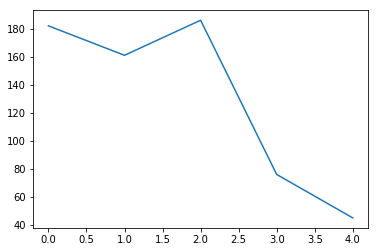

Real Percentage of gain: 111.44530866911288
Percentage of gain: 1.5970411505307485
Total gain: 1039.6737889955173
000000000000000000000000000000000000000000000000
Percentile:  0
[[48 24]
 [28 82]]
0.7142857142857143
Percentile:  1
[[19  0]
 [59 83]]
0.6335403726708074
Percentile:  2
[[  0   0]
 [ 16 170]]
0.9139784946236559
Percentile:  3
[[76]]
1.0
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
151
107
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.663994655978624
G-score: 0.4586614986788954
Accuracy 0.5548672566371682
Window: 140
[[130 325]
 [178 497]]
Vol pos 3.1264794398432434
Vol neg 2.741903933790708


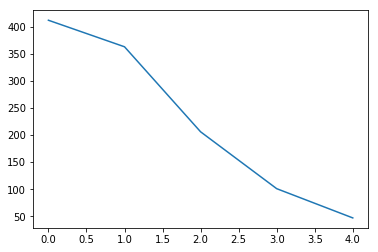

Real Percentage of gain: 50.51255685673735
Percentage of gain: 0.5142698496327323
Total gain: 581.1249300849875
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 78 154]
 [ 39 140]]
0.5304136253041363
Percentile:  1
[[ 28  83]
 [ 76 176]]
0.5619834710743802
Percentile:  2
[[21 76]
 [30 79]]
0.4854368932038835
Percentile:  3
[[ 2 12]
 [31 56]]
0.5742574257425742
Percentile:  4
[[ 0  0]
 [ 2 45]]
0.9574468085106383
000000000000000000000000000000000000000000000000
Working on... MSFT
151
107
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.29310344827586204
G-score: 0.3928131269074164
Accuracy 0.4194690265486726
Window: 140
[[338  81]
 [575 136]]
Vol pos 1.2554698505416095
Vol neg 1.806069732233739


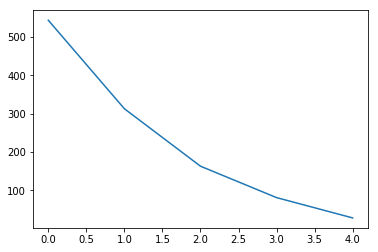

Real Percentage of gain: -23.305254844288303
Percentage of gain: -0.5218487037067344
Total gain: -589.6890351886099
000000000000000000000000000000000000000000000000
Percentile:  0
[[255  37]
 [218  34]]
0.53125
Percentile:  1
[[ 57  17]
 [176  63]]
0.38338658146964855
Percentile:  2
[[ 11  12]
 [113  27]]
0.2331288343558282
Percentile:  3
[[12  8]
 [54  7]]
0.2345679012345679
Percentile:  4
[[ 3  7]
 [14  4]]
0.25
000000000000000000000000000000000000000000000000
Working on... FB
151
112
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5256511444356747
G-score: 0.5371145898142471
Accuracy 0.46908127208480566
Window: 140
[[198  65]
 [536 333]]
Vol pos 3.398920500952355
Vol neg 2.793835962684233


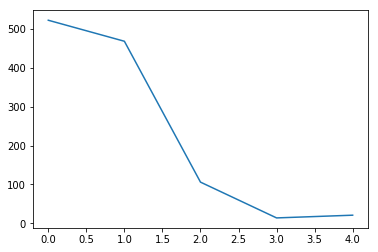

Real Percentage of gain: -71.22018028060737
Percentage of gain: 0.11107011698982025
Total gain: 125.73137243247652
000000000000000000000000000000000000000000000000
Percentile:  0
[[194  18]
 [269  41]]
0.4501915708812261
Percentile:  1
[[  3  34]
 [245 186]]
0.40384615384615385
Percentile:  2
[[ 0 13]
 [22 70]]
0.6666666666666666
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
151
109
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.281214848143982
G-score: 0.3874466034302112
Accuracy 0.43551236749116606
Window: 140
[[368  80]
 [559 125]]
Vol pos 2.599326350303817
Vol neg 2.1228783422123705


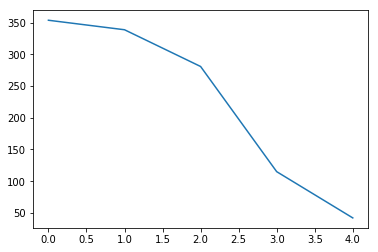

Real Percentage of gain: -78.72039318871639
Percentage of gain: -0.06629979679675185
Total gain: -75.0513699739231
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84  32]
 [210  28]]
0.3163841807909605
Percentile:  1
[[ 98  16]
 [191  37]]
0.39473684210526316
Percentile:  2
[[119   8]
 [ 96  55]]
0.6258992805755396
Percentile:  3
[[47 16]
 [48  3]]
0.43859649122807015
Percentile:  4
[[20  8]
 [12  2]]
0.5238095238095238
000000000000000000000000000000000000000000000000
Working on... CSCO
151
99
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.3895055499495459
G-score: 0.4518620188795566
Accuracy 0.4622222222222222
Window: 140
[[327 150]
 [455 193]]
Vol pos 2.1581078554043076
Vol neg 1.5695866634059572


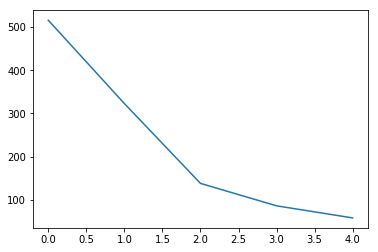

Real Percentage of gain: -7.650383503080595
Percentage of gain: 0.15343658084412073
Total gain: 172.61615344963582
000000000000000000000000000000000000000000000000
Percentile:  0
[[163  57]
 [236  60]]
0.4321705426356589
Percentile:  1
[[ 46  50]
 [150  77]]
0.38080495356037153
Percentile:  2
[[26 24]
 [41 47]]
0.5289855072463768
Percentile:  3
[[39 19]
 [22  6]]
0.5232558139534884
Percentile:  4
[[52  0]
 [ 3  3]]
0.9482758620689655
000000000000000000000000000000000000000000000000
Working on... CMCSA
151
105
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.45060658578856155
G-score: 0.43996428101445756
Accuracy 0.43992932862190814
Window: 140
[[238 302]
 [332 260]]
Vol pos 2.965360774068477
Vol neg 2.7717862251274177


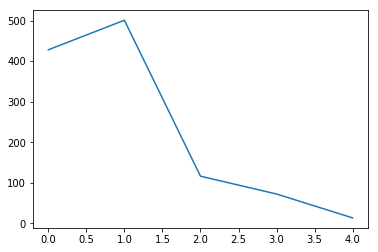

Real Percentage of gain: -42.700465027086665
Percentage of gain: -0.24784699756597275
Total gain: -280.56280124468117
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 91 136]
 [ 93 108]]
0.4649532710280374
Percentile:  1
[[ 79 118]
 [195 109]]
0.37524950099800397
Percentile:  2
[[24 18]
 [38 36]]
0.5172413793103449
Percentile:  3
[[35 25]
 [ 5  7]]
0.5833333333333334
Percentile:  4
[[8 5]
 [0 0]]
0.6153846153846154
000000000000000000000000000000000000000000000000
Working on... NVDA
151
102
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5641509433962264
G-score: 0.5960286732532494
Accuracy 0.5918727915194346
Window: 140
[[371 105]
 [357 299]]
Vol pos 4.106755617501667
Vol neg 3.281047719006291


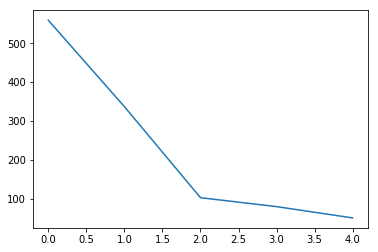

Real Percentage of gain: 227.28239806966513
Percentage of gain: 1.0915920649692674
Total gain: 1235.6822175452107
000000000000000000000000000000000000000000000000
Percentile:  0
[[251  62]
 [191  55]]
0.5474060822898033
Percentile:  1
[[105  12]
 [119 101]]
0.6112759643916914
Percentile:  2
[[12 19]
 [30 42]]
0.5242718446601942
Percentile:  3
[[ 3 12]
 [ 4 61]]
0.8
Percentile:  4
[[ 0  0]
 [12 39]]
0.7647058823529411
000000000000000000000000000000000000000000000000
Working on... NFLX
151
105
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.2617702448210923
G-score: 0.34226231284818004
Accuracy 0.30742049469964666
Window: 140
[[209  88]
 [696 139]]
Vol pos 3.3116212883679954
Vol neg 4.791659802823091


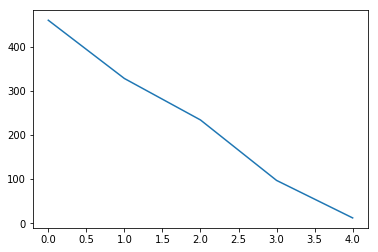

Real Percentage of gain: -296.59803500947453
Percentage of gain: -2.300545121078835
Total gain: -2604.217077061241
000000000000000000000000000000000000000000000000
Percentile:  0
[[136  34]
 [245  45]]
0.3934782608695652
Percentile:  1
[[ 45  15]
 [210  58]]
0.31402439024390244
Percentile:  2
[[ 20  18]
 [165  30]]
0.2145922746781116
Percentile:  3
[[ 7 20]
 [64  6]]
0.13402061855670103
Percentile:  4
[[ 0  1]
 [11  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
151
92
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7285067873303167
G-score: 0.7338623214561945
Accuracy 0.6984924623115578
Window: 140
[[117  14]
 [106 161]]
Vol pos 1.2040309018770672
Vol neg 1.1276692569104312


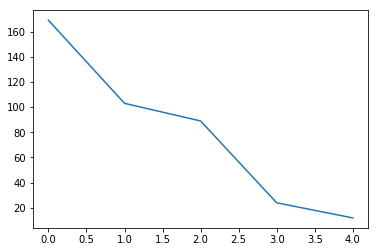

Real Percentage of gain: 127.29091617076833
Percentage of gain: 0.5010057283732988
Total gain: 199.40027989257294
000000000000000000000000000000000000000000000000
Percentile:  0
[[84 13]
 [38 37]]
0.7034883720930233
Percentile:  1
[[26  0]
 [27 47]]
0.73
Percentile:  2
[[ 7  0]
 [37 45]]
0.5842696629213483
Percentile:  3
[[ 0  0]
 [ 4 19]]
0.8260869565217391
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
151
96
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.10268948655256724
G-score: 0.22708425911342364
Accuracy 0.34986713906111605
Window: 140
[[353  35]
 [699  42]]
Vol pos 1.8851576736831335
Vol neg 2.989913842817159


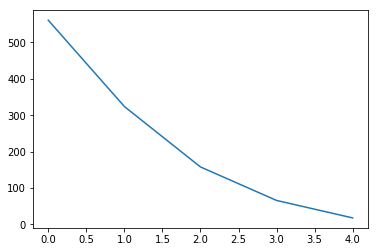

Real Percentage of gain: -257.0099586336168
Percentage of gain: -1.2842865186208656
Total gain: -1449.9594795229573
000000000000000000000000000000000000000000000000
Percentile:  0
[[249  28]
 [265  19]]
0.47771836007130125
Percentile:  1
[[ 58   5]
 [238  23]]
0.25
Percentile:  2
[[ 23   2]
 [133   0]]
0.14556962025316456
Percentile:  3
[[23  0]
 [43  0]]
0.3484848484848485
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
151
116
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7002652519893899
G-score: 0.5420660627989509
Accuracy 0.597506678539626
Window: 140
[[143 177]
 [275 528]]
Vol pos 2.013260316770104
Vol neg 1.8094955376528126


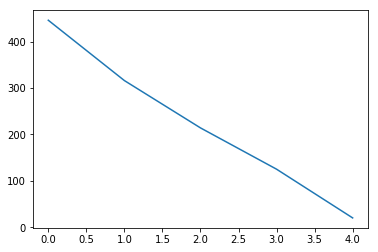

Real Percentage of gain: 142.91634311655173
Percentage of gain: 0.4746266157913346
Total gain: 533.0056895336687
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 58 107]
 [105 176]]
0.5246636771300448
Percentile:  1
[[ 38  17]
 [ 88 173]]
0.6677215189873418
Percentile:  2
[[ 19   7]
 [ 70 118]]
0.6401869158878505
Percentile:  3
[[26 30]
 [12 57]]
0.664
Percentile:  4
[[ 2 15]
 [ 0  3]]
0.25
000000000000000000000000000000000000000000000000
Working on... TXN
151
96
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.549828178694158
G-score: 0.571912724408059
Accuracy 0.5366931918656057
Window: 140
[[287  81]
 [443 320]]
Vol pos 2.282549761886977
Vol neg 2.7429240410225426


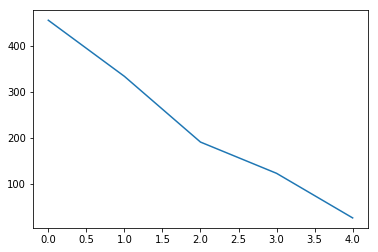

Real Percentage of gain: 10.519118473454014
Percentage of gain: -0.04578646510204896
Total gain: -51.78449203041737
000000000000000000000000000000000000000000000000
Percentile:  0
[[174  34]
 [149  98]]
0.5978021978021978
Percentile:  1
[[109  20]
 [122  83]]
0.5748502994011976
Percentile:  2
[[  4  10]
 [108  70]]
0.3854166666666667
Percentile:  3
[[ 0 10]
 [62 50]]
0.4098360655737705
Percentile:  4
[[ 0  7]
 [ 2 17]]
0.6538461538461539
000000000000000000000000000000000000000000000000
Working on... AVGO
151
113
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.6193643754619363
G-score: 0.5255995888663311
Accuracy 0.5430346051464063
Window: 140
[[193 213]
 [302 419]]
Vol pos 3.6882345928003253
Vol neg 2.6240263511649675


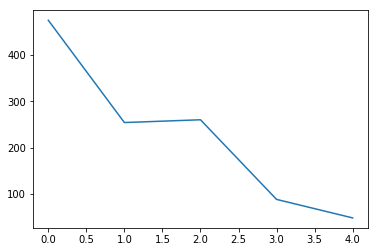

Real Percentage of gain: 70.01831478281868
Percentage of gain: 0.8037497781223077
Total gain: 905.8259999438408
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 83 118]
 [146 128]]
0.4442105263157895
Percentile:  1
[[ 36  68]
 [ 40 110]]
0.5748031496062992
Percentile:  2
[[ 22  16]
 [ 93 129]]
0.5807692307692308
Percentile:  3
[[18  7]
 [23 40]]
0.6590909090909091
Percentile:  4
[[34  3]
 [ 0 11]]
0.9375
000000000000000000000000000000000000000000000000
Working on... PYPL
151
109
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.663983903420523
G-score: 0.5052478019883386
Accuracy 0.5562444641275465
Window: 140
[[133 185]
 [316 495]]
Vol pos 2.863675595763751
Vol neg 2.967825144206542


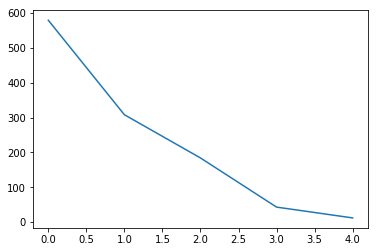

Real Percentage of gain: 84.66567541700844
Percentage of gain: 0.27591485995762427
Total gain: 311.5078768921578
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 45  89]
 [157 288]]
0.5751295336787565
Percentile:  1
[[ 25  26]
 [123 134]]
0.5162337662337663
Percentile:  2
[[59 61]
 [19 45]]
0.5652173913043478
Percentile:  3
[[ 4  9]
 [15 15]]
0.4418604651162791
Percentile:  4
[[ 0  0]
 [ 2 10]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... GILD
151
110
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.47076689445709946
G-score: 0.34357038250019367
Accuracy 0.3820921985815603
Window: 140
[[121 461]
 [236 310]]
Vol pos 3.1239280412721997
Vol neg 3.3099513736436785


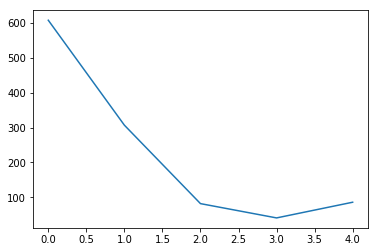

Real Percentage of gain: -203.25866095222358
Percentage of gain: -0.8516162425898278
Total gain: -960.6231216413257
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 52 287]
 [ 93 176]]
0.375
Percentile:  1
[[ 38  65]
 [127  77]]
0.3745928338762215
Percentile:  2
[[ 0 12]
 [15 55]]
0.6707317073170732
Percentile:  3
[[ 2 39]
 [ 0  0]]
0.04878048780487805
Percentile:  4
[[29 57]
 [ 0  0]]
0.3372093023255814
000000000000000000000000000000000000000000000000
Working on... COST
151
110
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.27507163323782235
G-score: 0.336026043027541
Accuracy 0.32653061224489793
Window: 140
[[224 161]
 [598 144]]
Vol pos 1.245148460179138
Vol neg 1.4568525506847685


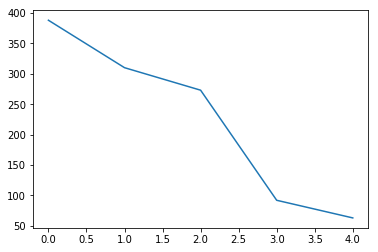

Real Percentage of gain: -137.9872425942178
Percentage of gain: -0.574566506321044
Total gain: -647.5364526238166
000000000000000000000000000000000000000000000000
Percentile:  0
[[110  90]
 [142  45]]
0.4005167958656331
Percentile:  1
[[ 55  49]
 [166  40]]
0.3064516129032258
Percentile:  2
[[ 53  15]
 [186  19]]
0.26373626373626374
Percentile:  3
[[ 5  7]
 [58 22]]
0.29347826086956524
Percentile:  4
[[ 0  0]
 [46 17]]
0.2698412698412698
000000000000000000000000000000000000000000000000
Working on... QCOM
151
101
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.5981308411214953
G-score: 0.5674486471783597
Accuracy 0.5437665782493368
Window: 140
[[231 124]
 [392 384]]
Vol pos 3.6962398744986924
Vol neg 2.941224424198417


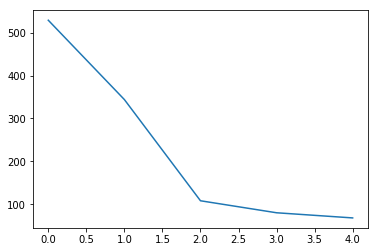

Real Percentage of gain: 42.849654031287656
Percentage of gain: 0.6680068257562447
Total gain: 755.5157199303128
000000000000000000000000000000000000000000000000
Percentile:  0
[[145  85]
 [149 150]]
0.55765595463138
Percentile:  1
[[ 23  25]
 [187 109]]
0.38372093023255816
Percentile:  2
[[13  5]
 [37 53]]
0.6111111111111112
Percentile:  3
[[12  0]
 [19 49]]
0.7625
Percentile:  4
[[38  8]
 [ 0 22]]
0.8823529411764706
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.49250742639747846
Mean gain over portfolio :  -36.173828712201065
Real mean gain over portfolio -19.78716197458038


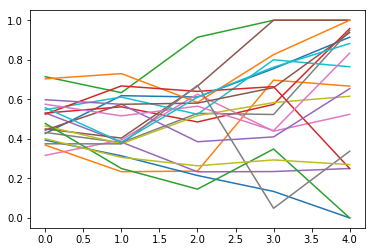

In [3]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        #feature sel on price
        rf = RandomForestClassifier()
        rf.fit(x[:,len(senttemp[0]):], y)
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        treshold=0.9
        optimump=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimump=order[0:u]
                break
       #adjust index shift
        optimump=optimump+len(senttemp[0])
        
        #feature sel on sentiment
        rf = RandomForestClassifier()
        rf.fit(x[:,0:len(senttemp[0])], y)
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        optimums=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimums=order[0:u]
                break
        optimumtot=np.concatenate((optimums,optimump))

        print(len(x[0]))
        x=x[:,optimumtot]
        print(len(x[0]))
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

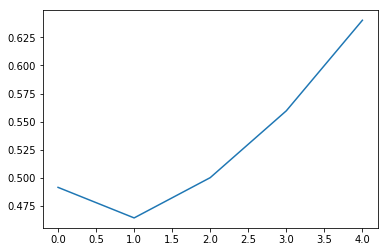

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
151
78
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.2748538011695907
G-score: 0.33076918657681764
Accuracy 0.3415929203539823
Window: 140
[[245 261]
 [483 141]]
Vol pos 3.5544025998001523
Vol neg 2.9767997561548536


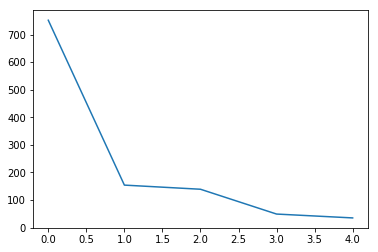

Real Percentage of gain: -158.5813474870562
Percentage of gain: -0.7457872699613737
Total gain: -842.7396150563522
000000000000000000000000000000000000000000000000
Percentile:  0
[[158 220]
 [307  68]]
0.300132802124834
Percentile:  1
[[36 32]
 [61 23]]
0.3881578947368421
Percentile:  2
[[51  9]
 [68 11]]
0.4460431654676259
Percentile:  3
[[ 0  0]
 [18 31]]
0.6326530612244898
Percentile:  4
[[ 0  0]
 [28  7]]
0.2
000000000000000000000000000000000000000000000000
Working on... AMZN
151
76
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.3108348134991119
G-score: 0.378471774856016
Accuracy 0.31448763250883394
Window: 140
[[181  70]
 [706 175]]
Vol pos 2.406609116613603
Vol neg 2.3429096178936137


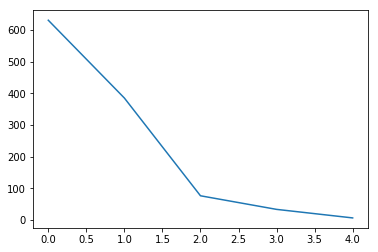

Real Percentage of gain: -155.53474138263257
Percentage of gain: -0.8492447155220862
Total gain: -961.3450179710015
000000000000000000000000000000000000000000000000
Percentile:  0
[[175  24]
 [377  54]]
0.3634920634920635
Percentile:  1
[[  5  31]
 [277  72]]
0.2
Percentile:  2
[[ 1 15]
 [41 19]]
0.2631578947368421
Percentile:  3
[[ 0  0]
 [10 23]]
0.696969696969697
Percentile:  4
[[0 0]
 [1 5]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... PEP
151
80
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.8440000000000001
G-score: 0.7775045619152714
Accuracy 0.7603686635944701
Window: 140
[[ 73  18]
 [138 422]]
Vol pos 2.3550121771973878
Vol neg 1.2173131715261962


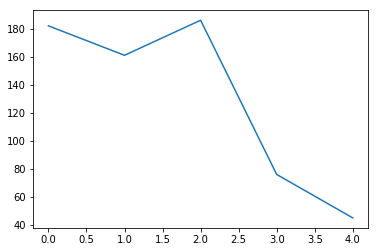

Real Percentage of gain: 88.6021372651798
Percentage of gain: 1.4989710798074045
Total gain: 975.8301729546204
000000000000000000000000000000000000000000000000
Percentile:  0
[[54 18]
 [44 66]]
0.6593406593406593
Percentile:  1
[[19  0]
 [79 63]]
0.5093167701863354
Percentile:  2
[[  0   0]
 [ 15 171]]
0.9193548387096774
Percentile:  3
[[76]]
1.0
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
151
84
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.6512549537648613
G-score: 0.4182915812777577
Accuracy 0.5327433628318584
Window: 140
[[109 346]
 [182 493]]
Vol pos 3.0505975196772375
Vol neg 2.8466298875620115


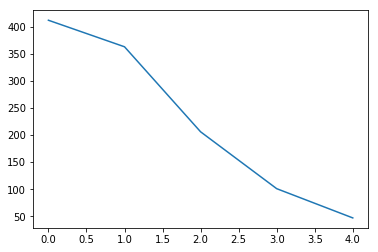

Real Percentage of gain: 40.240741540319874
Percentage of gain: 0.29507887275482725
Total gain: 333.43912621295476
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67 165]
 [ 32 147]]
0.5206812652068127
Percentile:  1
[[ 22  89]
 [ 67 185]]
0.5702479338842975
Percentile:  2
[[20 77]
 [42 67]]
0.4223300970873786
Percentile:  3
[[ 0 14]
 [37 50]]
0.49504950495049505
Percentile:  4
[[ 0  0]
 [ 4 43]]
0.9148936170212766
000000000000000000000000000000000000000000000000
Working on... MSFT
151
84
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.3010752688172043
G-score: 0.39972532519949167
Accuracy 0.4247787610619469
Window: 140
[[340  79]
 [571 140]]
Vol pos 1.213832266609977
Vol neg 1.8418999469681032


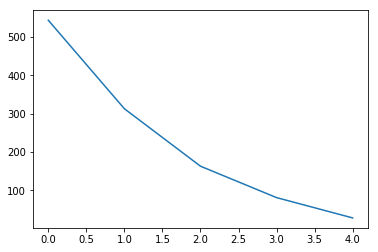

Real Percentage of gain: -16.474855999019532
Percentage of gain: -0.5438898031473258
Total gain: -614.5954775564782
000000000000000000000000000000000000000000000000
Percentile:  0
[[257  35]
 [211  41]]
0.5477941176470589
Percentile:  1
[[ 59  15]
 [175  64]]
0.3929712460063898
Percentile:  2
[[ 10  13]
 [116  24]]
0.2085889570552147
Percentile:  3
[[11  9]
 [56  5]]
0.19753086419753085
Percentile:  4
[[ 3  7]
 [13  5]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... FB
151
89
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.6171932402645113
G-score: 0.5924525408219656
Accuracy 0.5397526501766784
Window: 140
[[191  72]
 [449 420]]
Vol pos 3.306405457322175
Vol neg 2.809421238301489


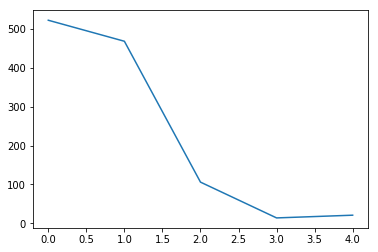

Real Percentage of gain: -5.566500356345835
Percentage of gain: 0.4916124286826618
Total gain: 556.5052692687732
000000000000000000000000000000000000000000000000
Percentile:  0
[[181  31]
 [219  91]]
0.5210727969348659
Percentile:  1
[[  7  30]
 [212 219]]
0.4829059829059829
Percentile:  2
[[ 2 11]
 [13 79]]
0.7714285714285715
Percentile:  3
[[14]]
1.0
Percentile:  4
[[ 0  0]
 [ 5 16]]
0.7619047619047619
000000000000000000000000000000000000000000000000
Working on... INTC
151
85
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.43443282381335485
G-score: 0.37429444904575615
Accuracy 0.3789752650176678
Window: 140
[[159 289]
 [414 270]]
Vol pos 2.126766408711288
Vol neg 2.454629248984841


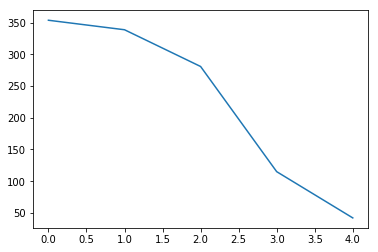

Real Percentage of gain: -121.92833729571312
Percentage of gain: -0.7183936154586579
Total gain: -813.2215726992007
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 50  66]
 [143  95]]
0.4096045197740113
Percentile:  1
[[ 44  70]
 [137  91]]
0.39473684210526316
Percentile:  2
[[49 78]
 [79 72]]
0.4352517985611511
Percentile:  3
[[11 52]
 [47  4]]
0.13157894736842105
Percentile:  4
[[ 5 23]
 [ 7  7]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... CSCO
151
75
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.3419354838709678
G-score: 0.4267303193260338
Accuracy 0.456
Window: 140
[[354 123]
 [489 159]]
Vol pos 2.2480942277998666
Vol neg 1.500888361616852


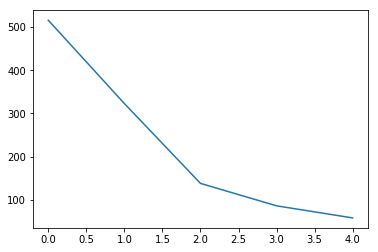

Real Percentage of gain: -2.4186470514271283
Percentage of gain: 0.2086476991571716
Total gain: 234.72866155181805
000000000000000000000000000000000000000000000000
Percentile:  0
[[180  40]
 [260  36]]
0.4186046511627907
Percentile:  1
[[ 52  44]
 [166  61]]
0.3498452012383901
Percentile:  2
[[25 25]
 [40 48]]
0.5289855072463768
Percentile:  3
[[44 14]
 [20  8]]
0.6046511627906976
Percentile:  4
[[52  0]
 [ 0  6]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
151
84
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.4697986577181208
G-score: 0.43896775814710204
Accuracy 0.4416961130742049
Window: 140
[[220 320]
 [312 280]]
Vol pos 3.103915119128785
Vol neg 2.6615578681210295


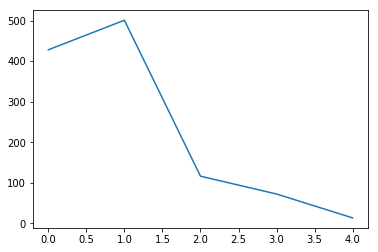

Real Percentage of gain: -6.979768924684803
Percentage of gain: -0.11497085961846132
Total gain: -130.14701308809822
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 83 144]
 [ 90 111]]
0.4532710280373832
Percentile:  1
[[ 58 139]
 [180 124]]
0.36327345309381237
Percentile:  2
[[22 20]
 [36 38]]
0.5172413793103449
Percentile:  3
[[46 14]
 [ 5  7]]
0.7361111111111112
Percentile:  4
[[10  3]
 [ 0  0]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... NVDA
151
81
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5979020979020979
G-score: 0.601193985190698
Accuracy 0.5936395759717314
Window: 140
[[330 146]
 [314 342]]
Vol pos 4.122628471820962
Vol neg 3.2542695148768215


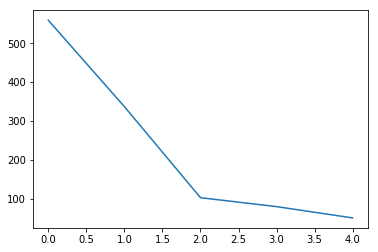

Real Percentage of gain: 207.36025490317382
Percentage of gain: 1.1249490779331697
Total gain: 1273.442356220348
000000000000000000000000000000000000000000000000
Percentile:  0
[[218  95]
 [142 104]]
0.5760286225402504
Percentile:  1
[[101  16]
 [130  90]]
0.5667655786350149
Percentile:  2
[[ 4 27]
 [32 40]]
0.42718446601941745
Percentile:  3
[[ 7  8]
 [ 1 64]]
0.8875
Percentile:  4
[[ 0  0]
 [ 9 42]]
0.8235294117647058
000000000000000000000000000000000000000000000000
Working on... NFLX
151
84
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.22759856630824368
G-score: 0.27061285103904953
Accuracy 0.23851590106007067
Window: 140
[[143 154]
 [708 127]]
Vol pos 3.4869945361110557
Vol neg 4.602803908370515


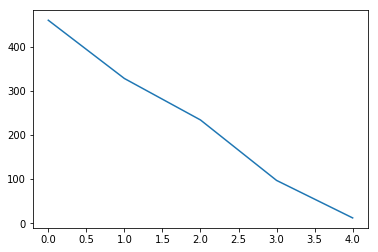

Real Percentage of gain: -322.23041259107316
Percentage of gain: -2.6732583429906347
Total gain: -3026.1284442653982
000000000000000000000000000000000000000000000000
Percentile:  0
[[128  42]
 [257  33]]
0.35
Percentile:  1
[[  8  52]
 [235  33]]
0.125
Percentile:  2
[[  3  35]
 [163  32]]
0.15021459227467812
Percentile:  3
[[ 2 25]
 [49 21]]
0.23711340206185566
Percentile:  4
[[1 0]
 [4 7]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... BKNG
151
61
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7950963222416813
G-score: 0.5919956697254367
Accuracy 0.7060301507537688
Window: 140
[[ 54  77]
 [ 40 227]]
Vol pos 1.3361201393613071
Vol neg 0.8084713024833279


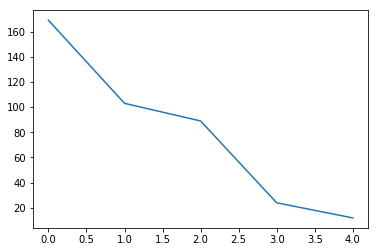

Real Percentage of gain: 183.34220182565267
Percentage of gain: 0.7056749165074824
Total gain: 280.85861676997797
000000000000000000000000000000000000000000000000
Percentile:  0
[[37 60]
 [15 60]]
0.563953488372093
Percentile:  1
[[12 14]
 [ 7 67]]
0.79
Percentile:  2
[[ 5  2]
 [15 67]]
0.8089887640449438
Percentile:  3
[[ 0  0]
 [ 3 20]]
0.8695652173913043
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
151
74
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.07499999999999998
G-score: 0.1935454138046371
Accuracy 0.3445527015057573
Window: 140
[[359  29]
 [711  30]]
Vol pos 1.9043031943471254
Vol neg 2.970892025853515


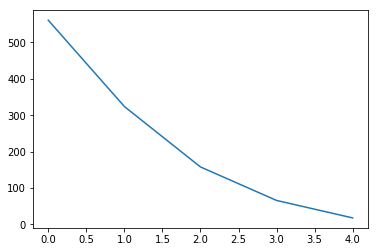

Real Percentage of gain: -263.63627557516014
Percentage of gain: -1.291130342365429
Total gain: -1457.6861565305694
000000000000000000000000000000000000000000000000
Percentile:  0
[[254  23]
 [276   8]]
0.46702317290552586
Percentile:  1
[[ 58   5]
 [239  22]]
0.24691358024691357
Percentile:  2
[[ 24   1]
 [133   0]]
0.1518987341772152
Percentile:  3
[[23  0]
 [43  0]]
0.3484848484848485
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
151
92
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7465798045602605
G-score: 0.5991802463544836
Accuracy 0.653606411398041
Window: 140
[[161 159]
 [230 573]]
Vol pos 2.0649349659472236
Vol neg 1.6789907212507704


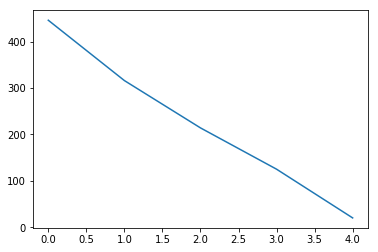

Real Percentage of gain: 207.00688327248847
Percentage of gain: 0.768063111699655
Total gain: 862.5348744387126
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 55 110]
 [ 82 199]]
0.5695067264573991
Percentile:  1
[[ 36  19]
 [ 72 189]]
0.7120253164556962
Percentile:  2
[[ 23   3]
 [ 67 121]]
0.6728971962616822
Percentile:  3
[[39 17]
 [ 9 60]]
0.792
Percentile:  4
[[ 7 10]
 [ 0  3]]
0.5
000000000000000000000000000000000000000000000000
Working on... TXN
151
72
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.6110665597433841
G-score: 0.5996519447485613
Accuracy 0.5711759504862953
Window: 140
[[265 103]
 [382 381]]
Vol pos 2.3224924145737216
Vol neg 2.726741862157905


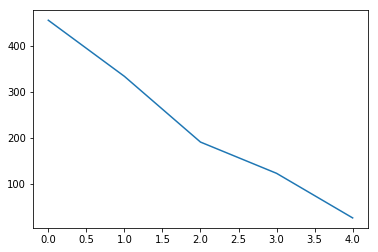

Real Percentage of gain: 27.380219404334323
Percentage of gain: 0.15725932508226373
Total gain: 177.8602966680403
000000000000000000000000000000000000000000000000
Percentile:  0
[[157  51]
 [122 125]]
0.6197802197802198
Percentile:  1
[[103  26]
 [102 103]]
0.6167664670658682
Percentile:  2
[[ 5  9]
 [95 83]]
0.4583333333333333
Percentile:  3
[[ 0 10]
 [61 51]]
0.4180327868852459
Percentile:  4
[[ 0  7]
 [ 1 18]]
0.6923076923076923
000000000000000000000000000000000000000000000000
Working on... AVGO
151
87
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.6304503216583274
G-score: 0.5045822835611947
Accuracy 0.541259982253771
Window: 140
[[169 237]
 [280 441]]
Vol pos 3.686955775672687
Vol neg 2.6296520666990726


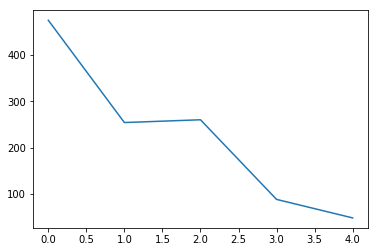

Real Percentage of gain: 64.14186523084359
Percentage of gain: 0.7892749819670973
Total gain: 889.5129046769187
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 53 148]
 [121 153]]
0.4336842105263158
Percentile:  1
[[ 39  65]
 [ 37 113]]
0.5984251968503937
Percentile:  2
[[ 20  18]
 [ 95 127]]
0.5653846153846154
Percentile:  3
[[19  6]
 [27 36]]
0.625
Percentile:  4
[[37  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
151
88
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.664364640883978
G-score: 0.5496750927430379
Accuracy 0.5695305580159433
Window: 140
[[162 156]
 [330 481]]
Vol pos 3.0442867545303187
Vol neg 2.7320828975804923


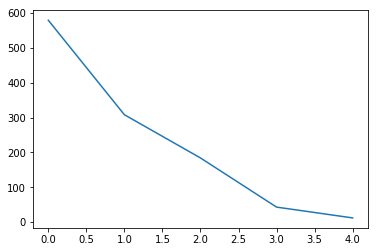

Real Percentage of gain: 69.00625512715341
Percentage of gain: 0.5577361336925383
Total gain: 629.6840949388757
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 47  87]
 [173 272]]
0.5509499136442142
Percentile:  1
[[ 30  21]
 [120 137]]
0.5422077922077922
Percentile:  2
[[79 41]
 [22 42]]
0.657608695652174
Percentile:  3
[[ 6  7]
 [14 16]]
0.5116279069767442
Percentile:  4
[[ 0  0]
 [ 1 11]]
0.9166666666666666
000000000000000000000000000000000000000000000000
Working on... GILD
151
85
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.16262135922330095
G-score: 0.2796833046557539
Accuracy 0.3882978723404255
Window: 140
[[371 211]
 [479  67]]
Vol pos 2.535976945534844
Vol neg 3.6850596972082665


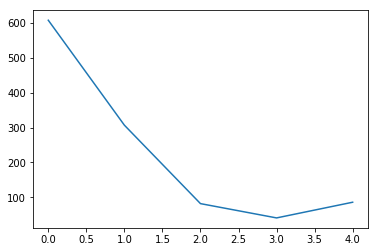

Real Percentage of gain: -165.99758235116352
Percentage of gain: -1.2694444050792928
Total gain: -1431.9332889294424
000000000000000000000000000000000000000000000000
Percentile:  0
[[269  70]
 [212  57]]
0.5361842105263158
Percentile:  1
[[ 50  53]
 [195   9]]
0.19218241042345277
Percentile:  2
[[ 2 10]
 [70  0]]
0.024390243902439025
Percentile:  3
[[ 4 37]
 [ 0  0]]
0.0975609756097561
Percentile:  4
[[46 40]
 [ 0  0]]
0.5348837209302325
000000000000000000000000000000000000000000000000
Working on... COST
151
86
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.3989169675090252
G-score: 0.43089300140602466
Accuracy 0.4090505767524401
Window: 140
[[240 145]
 [521 221]]
Vol pos 1.1334926042620304
Vol neg 1.563702145271571


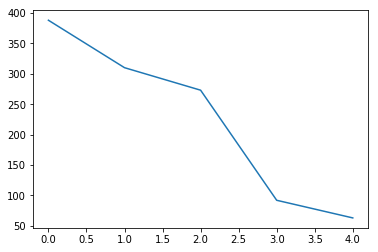

Real Percentage of gain: -115.93674717950682
Percentage of gain: -0.4604130773611982
Total gain: -518.8855381860703
000000000000000000000000000000000000000000000000
Percentile:  0
[[109  91]
 [107  80]]
0.4883720930232558
Percentile:  1
[[ 63  41]
 [137  69]]
0.4258064516129032
Percentile:  2
[[ 56  12]
 [147  58]]
0.4175824175824176
Percentile:  3
[[11  1]
 [70 10]]
0.22826086956521738
Percentile:  4
[[ 0  0]
 [59  4]]
0.06349206349206349
000000000000000000000000000000000000000000000000
Working on... QCOM
151
76
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.6033950617283951
G-score: 0.5663665048886063
Accuracy 0.5455349248452697
Window: 140
[[226 129]
 [385 391]]
Vol pos 3.757658334539965
Vol neg 2.864560570606852


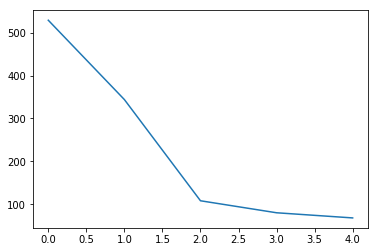

Real Percentage of gain: 48.85394103489762
Percentage of gain: 0.7480911221213408
Total gain: 846.0910591192364
000000000000000000000000000000000000000000000000
Percentile:  0
[[132  98]
 [151 148]]
0.5293005671077504
Percentile:  1
[[ 32  16]
 [184 112]]
0.4186046511627907
Percentile:  2
[[13  5]
 [29 61]]
0.6851851851851852
Percentile:  3
[[12  0]
 [21 47]]
0.7375
Percentile:  4
[[37  9]
 [ 0 22]]
0.8676470588235294
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4875794987001578
Mean gain over portfolio :  -136.8097345731167
Real mean gain over portfolio -19.967535829486955


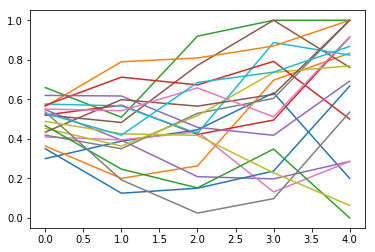

In [5]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        #feature sel on price
        rf = RandomForestClassifier()
        rf.fit(x[:,len(senttemp[0]):], y)
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        treshold=0.8
        optimump=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimump=order[0:u]
                break
       #adjust index shift
        optimump=optimump+len(senttemp[0])
        
        #feature sel on sentiment
        rf = RandomForestClassifier()
        rf.fit(x[:,0:len(senttemp[0])], y)
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        optimums=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimums=order[0:u]
                break
        optimumtot=np.concatenate((optimums,optimump))

        print(len(x[0]))
        x=x[:,optimumtot]
        print(len(x[0]))
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

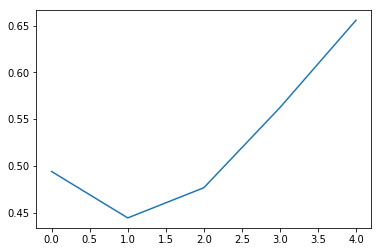

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
151
61
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.32643118148599265
G-score: 0.43359743961095343
Accuracy 0.5106194690265486
Window: 140
[[443  63]
 [490 134]]
Vol pos 3.0704194223410544
Vol neg 3.282290082118047


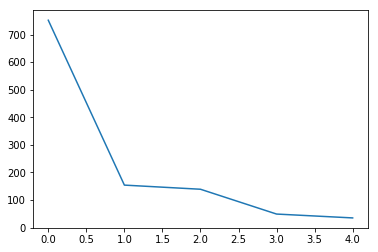

Real Percentage of gain: -7.941852994379376
Percentage of gain: -0.03847292807123163
Total gain: -43.47440872049174
000000000000000000000000000000000000000000000000
Percentile:  0
[[333  45]
 [336  39]]
0.4940239043824701
Percentile:  1
[[57 11]
 [53 31]]
0.5789473684210527
Percentile:  2
[[53  7]
 [37 42]]
0.6834532374100719
Percentile:  3
[[ 0  0]
 [39 10]]
0.20408163265306123
Percentile:  4
[[ 0  0]
 [23 12]]
0.34285714285714286
000000000000000000000000000000000000000000000000
Working on... AMZN
151
60
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.3157894736842105
G-score: 0.37417577000982843
Accuracy 0.31095406360424027
Window: 140
[[172  79]
 [701 180]]
Vol pos 2.435458687810313
Vol neg 2.330216988321355


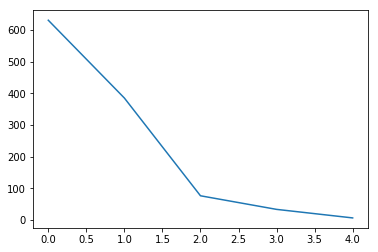

Real Percentage of gain: -155.40958582519198
Percentage of gain: -0.8483107710083274
Total gain: -960.2877927814267
000000000000000000000000000000000000000000000000
Percentile:  0
[[165  34]
 [371  60]]
0.35714285714285715
Percentile:  1
[[  4  32]
 [282  67]]
0.18441558441558442
Percentile:  2
[[ 3 13]
 [35 25]]
0.3684210526315789
Percentile:  3
[[ 0  0]
 [ 7 26]]
0.7878787878787878
Percentile:  4
[[0 0]
 [5 1]]
0.16666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
151
59
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.8463073852295409
G-score: 0.7793448119733425
Accuracy 0.7634408602150538
Window: 140
[[ 73  18]
 [136 424]]
Vol pos 2.3525946075847397
Vol neg 1.2103400162414135


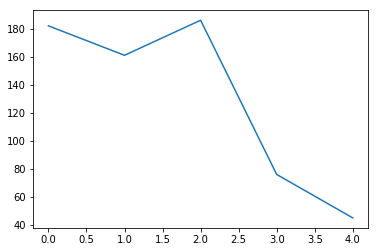

Real Percentage of gain: 89.06205508868638
Percentage of gain: 1.509749857862424
Total gain: 982.8471574684379
000000000000000000000000000000000000000000000000
Percentile:  0
[[54 18]
 [44 66]]
0.6593406593406593
Percentile:  1
[[19  0]
 [76 66]]
0.5279503105590062
Percentile:  2
[[  0   0]
 [ 16 170]]
0.9139784946236559
Percentile:  3
[[76]]
1.0
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
151
68
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.38404452690166974
G-score: 0.41780869134581505
Accuracy 0.41238938053097346
Window: 140
[[259 196]
 [468 207]]
Vol pos 2.6298283833239613
Vol neg 3.183705212122701


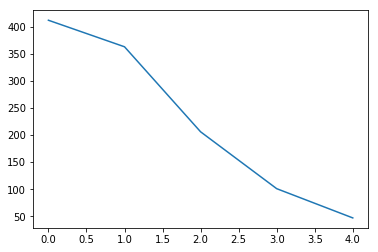

Real Percentage of gain: -103.20618426460318
Percentage of gain: -0.786265694000449
Total gain: -888.4802342205073
000000000000000000000000000000000000000000000000
Percentile:  0
[[152  80]
 [119  60]]
0.5158150851581509
Percentile:  1
[[ 40  71]
 [168  84]]
0.3415977961432507
Percentile:  2
[[63 34]
 [80 29]]
0.44660194174757284
Percentile:  3
[[ 3 11]
 [70 17]]
0.19801980198019803
Percentile:  4
[[ 0  0]
 [31 16]]
0.3404255319148936
000000000000000000000000000000000000000000000000
Working on... MSFT
151
63
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.21125143513203218
G-score: 0.32923474414429554
Accuracy 0.3920353982300885
Window: 140
[[351  68]
 [619  92]]
Vol pos 1.2011630053849816
Vol neg 1.8162434383064177


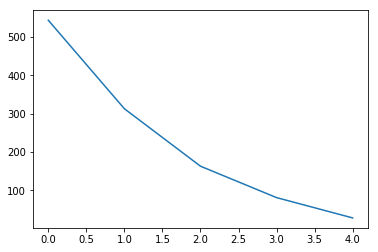

Real Percentage of gain: -46.080749485953916
Percentage of gain: -0.6333133015318249
Total gain: -715.6440307309621
000000000000000000000000000000000000000000000000
Percentile:  0
[[266  26]
 [231  21]]
0.5275735294117647
Percentile:  1
[[ 59  15]
 [201  38]]
0.30990415335463256
Percentile:  2
[[ 16   7]
 [120  20]]
0.22085889570552147
Percentile:  3
[[ 9 11]
 [56  5]]
0.1728395061728395
Percentile:  4
[[ 1  9]
 [11  7]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... FB
151
71
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.6450704225352113
G-score: 0.5836727760689893
Accuracy 0.5547703180212014
Window: 140
[[170  93]
 [411 458]]
Vol pos 3.306188984750723
Vol neg 2.792927613403712


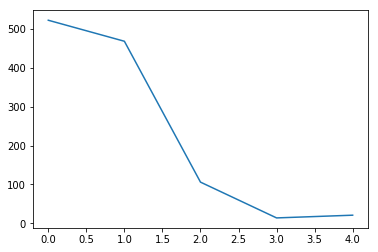

Real Percentage of gain: -10.699781633992657
Percentage of gain: 0.5906812414028119
Total gain: 668.6511652679831
000000000000000000000000000000000000000000000000
Percentile:  0
[[166  46]
 [196 114]]
0.5363984674329502
Percentile:  1
[[  3  34]
 [205 226]]
0.4893162393162393
Percentile:  2
[[ 0 13]
 [ 7 85]]
0.8095238095238095
Percentile:  3
[[14]]
1.0
Percentile:  4
[[ 0  0]
 [ 3 18]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... INTC
151
63
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.3464991023339318
G-score: 0.36454640879969624
Accuracy 0.3568904593639576
Window: 140
[[211 237]
 [491 193]]
Vol pos 2.229250589990323
Vol neg 2.3864971332656504


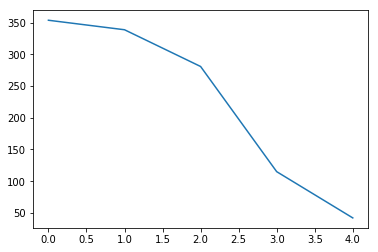

Real Percentage of gain: -157.3905784559464
Percentage of gain: -0.7391808080046846
Total gain: -836.7526746613029
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 66  50]
 [174  64]]
0.3672316384180791
Percentile:  1
[[ 48  66]
 [161  67]]
0.3362573099415205
Percentile:  2
[[69 58]
 [90 61]]
0.4676258992805755
Percentile:  3
[[14 49]
 [51  0]]
0.12280701754385964
Percentile:  4
[[14 14]
 [13  1]]
0.35714285714285715
000000000000000000000000000000000000000000000000
Working on... CSCO
151
55
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.3464373464373464
G-score: 0.45407969417511196
Accuracy 0.5271111111111111
Window: 140
[[452  25]
 [507 141]]
Vol pos 2.2437811018642355
Vol neg 1.3933342533183304


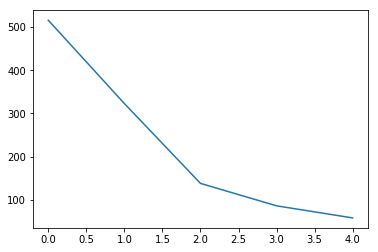

Real Percentage of gain: 80.74506475543825
Percentage of gain: 0.5238296627912354
Total gain: 589.3083706401399
000000000000000000000000000000000000000000000000
Percentile:  0
[[203  17]
 [257  39]]
0.4689922480620155
Percentile:  1
[[ 88   8]
 [170  57]]
0.44891640866873067
Percentile:  2
[[50  0]
 [65 23]]
0.5289855072463768
Percentile:  3
[[58  0]
 [12 16]]
0.8604651162790697
Percentile:  4
[[52  0]
 [ 0  6]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
151
66
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.5337726523887973
G-score: 0.4952476857798229
Accuracy 0.5
Window: 140
[[242 298]
 [268 324]]
Vol pos 3.09201163449001
Vol neg 2.6218790584726825


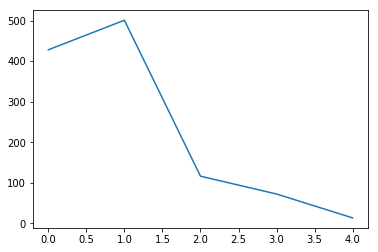

Real Percentage of gain: 50.982357735270234
Percentage of gain: 0.2350662880086637
Total gain: 266.0950380258073
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 88 139]
 [ 86 115]]
0.4742990654205608
Percentile:  1
[[ 70 127]
 [143 161]]
0.46107784431137727
Percentile:  2
[[27 15]
 [33 41]]
0.5862068965517241
Percentile:  3
[[46 14]
 [ 5  7]]
0.7361111111111112
Percentile:  4
[[10  3]
 [ 0  0]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... NVDA
151
62
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.47008547008547014
G-score: 0.5413805010294105
Accuracy 0.5618374558303887
Window: 140
[[416  60]
 [436 220]]
Vol pos 3.7844105221326783
Vol neg 3.750978261755322


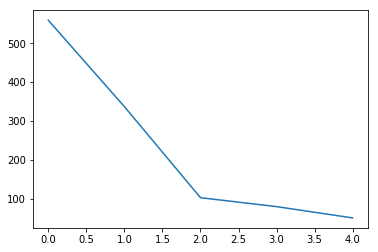

Real Percentage of gain: 155.94680442987078
Percentage of gain: 0.48268540127715887
Total gain: 546.3998742457438
000000000000000000000000000000000000000000000000
Percentile:  0
[[292  21]
 [214  32]]
0.5796064400715564
Percentile:  1
[[109   8]
 [145  75]]
0.5459940652818991
Percentile:  2
[[15 16]
 [43 29]]
0.42718446601941745
Percentile:  3
[[ 0 15]
 [14 51]]
0.6375
Percentile:  4
[[ 0  0]
 [19 32]]
0.6274509803921569
000000000000000000000000000000000000000000000000
Working on... NFLX
151
64
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.24904214559386972
G-score: 0.3380480698214833
Accuracy 0.30742049469964666
Window: 140
[[218  79]
 [705 130]]
Vol pos 3.1899628054890505
Vol neg 4.845661272264255


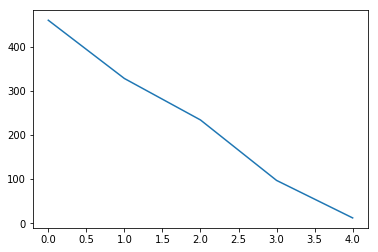

Real Percentage of gain: -300.0686312650591
Percentage of gain: -2.3753457430609424
Total gain: -2688.8913811449866
000000000000000000000000000000000000000000000000
Percentile:  0
[[140  30]
 [246  44]]
0.4
Percentile:  1
[[ 49  11]
 [202  66]]
0.35060975609756095
Percentile:  2
[[ 15  23]
 [177  18]]
0.14163090128755365
Percentile:  3
[[12 15]
 [68  2]]
0.14432989690721648
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
151
48
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7777777777777778
G-score: 0.6771272412588697
Accuracy 0.7085427135678392
Window: 140
[[ 79  52]
 [ 64 203]]
Vol pos 1.2468973182286036
Vol neg 1.0208263604362968


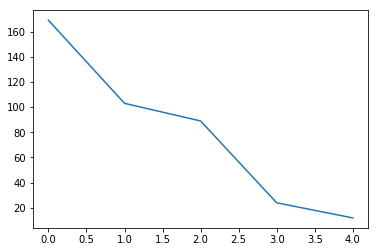

Real Percentage of gain: 179.83650491653935
Percentage of gain: 0.5859527284669743
Total gain: 233.20918592985578
000000000000000000000000000000000000000000000000
Percentile:  0
[[57 40]
 [20 55]]
0.6511627906976745
Percentile:  1
[[16 10]
 [13 61]]
0.77
Percentile:  2
[[ 6  1]
 [23 59]]
0.7303370786516854
Percentile:  3
[[ 0  0]
 [ 6 17]]
0.7391304347826086
Percentile:  4
[[ 0  0]
 [ 2 10]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... ADBE
151
53
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.06491885143570536
G-score: 0.1789218327827476
Accuracy 0.3365810451727192
Window: 140
[[354  34]
 [715  26]]
Vol pos 1.8510772614920175
Vol neg 2.9850796827311954


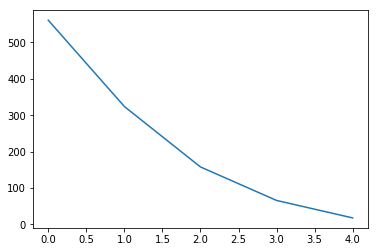

Real Percentage of gain: -266.258931470001
Percentage of gain: -1.3573209238252424
Total gain: -1532.4153229986987
000000000000000000000000000000000000000000000000
Percentile:  0
[[254  23]
 [276   8]]
0.46702317290552586
Percentile:  1
[[ 58   5]
 [243  18]]
0.2345679012345679
Percentile:  2
[[ 20   5]
 [133   0]]
0.12658227848101267
Percentile:  3
[[22  1]
 [43  0]]
0.3333333333333333
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
151
72
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7320954907161804
G-score: 0.5989561280573765
Accuracy 0.6402493321460374
Window: 140
[[167 153]
 [251 552]]
Vol pos 2.163850076143039
Vol neg 1.5172808188736784


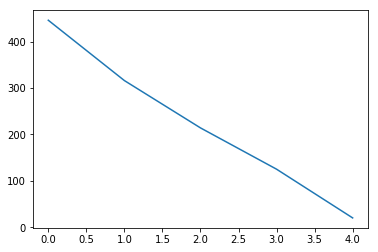

Real Percentage of gain: 199.1201076587389
Percentage of gain: 0.8395607782029197
Total gain: 942.826753921879
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 54 111]
 [111 170]]
0.5022421524663677
Percentile:  1
[[ 41  14]
 [ 72 189]]
0.7278481012658228
Percentile:  2
[[ 23   3]
 [ 65 123]]
0.6822429906542056
Percentile:  3
[[38 18]
 [ 2 67]]
0.84
Percentile:  4
[[10  7]
 [ 0  3]]
0.65
000000000000000000000000000000000000000000000000
Working on... TXN
151
55
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.5208888888888888
G-score: 0.5585772274304887
Accuracy 0.5234305923961097
Window: 140
[[299  69]
 [470 293]]
Vol pos 2.3094359256490384
Vol neg 2.700582254131683


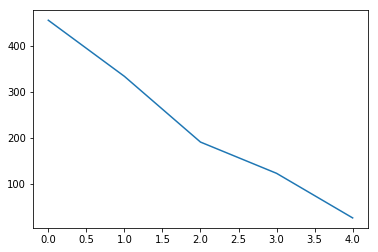

Real Percentage of gain: 15.424198001417038
Percentage of gain: -0.07818547037378112
Total gain: -88.42776699274646
000000000000000000000000000000000000000000000000
Percentile:  0
[[172  36]
 [160  87]]
0.5692307692307692
Percentile:  1
[[106  23]
 [132  73]]
0.5359281437125748
Percentile:  2
[[ 11   3]
 [100  78]]
0.4635416666666667
Percentile:  3
[[ 9  1]
 [66 46]]
0.45081967213114754
Percentile:  4
[[ 1  6]
 [11  8]]
0.34615384615384615
000000000000000000000000000000000000000000000000
Working on... AVGO
151
69
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.6186012977649602
G-score: 0.49766987095022824
Accuracy 0.5306122448979592
Window: 140
[[169 237]
 [292 429]]
Vol pos 3.7394057313672944
Vol neg 2.5943450175541


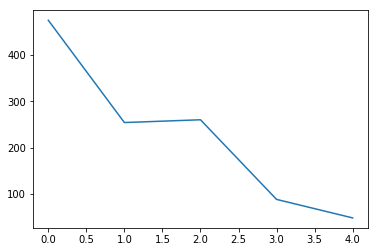

Real Percentage of gain: 55.49150158717419
Percentage of gain: 0.7664206859552112
Total gain: 863.756113071523
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 47 154]
 [130 144]]
0.40210526315789474
Percentile:  1
[[ 42  62]
 [ 36 114]]
0.6141732283464567
Percentile:  2
[[ 24  14]
 [ 99 123]]
0.5653846153846154
Percentile:  3
[[18  7]
 [27 36]]
0.6136363636363636
Percentile:  4
[[37  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
151
71
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.6748864373783259
G-score: 0.4666481650762783
Accuracy 0.5562444641275465
Window: 140
[[108 210]
 [291 520]]
Vol pos 2.9210767871558194
Vol neg 2.895873151802911


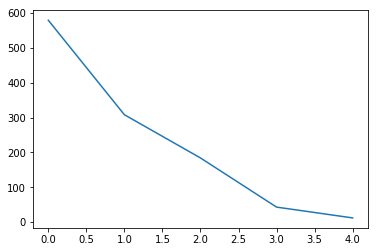

Real Percentage of gain: 88.498872026251
Percentage of gain: 0.3397730498499524
Total gain: 383.6037732805962
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 28 106]
 [149 296]]
0.5595854922279793
Percentile:  1
[[ 20  31]
 [109 148]]
0.5454545454545454
Percentile:  2
[[59 61]
 [16 48]]
0.5815217391304348
Percentile:  3
[[ 1 12]
 [15 15]]
0.37209302325581395
Percentile:  4
[[ 0  0]
 [ 2 10]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... GILD
151
69
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.6867924528301886
G-score: 0.37990774789048
Accuracy 0.5585106382978723
Window: 140
[[ 84 498]
 [  0 546]]
Vol pos 3.139403359668516
Vol neg 3.364708788407226


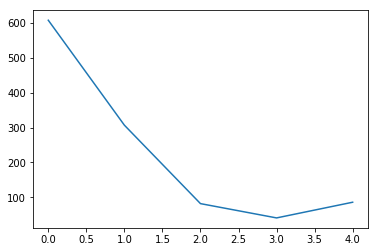

Real Percentage of gain: -116.65644660567585
Percentage of gain: 0.2679070389755021
Total gain: 302.1991399643664
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 15 324]
 [  0 269]]
0.46710526315789475
Percentile:  1
[[ 38  65]
 [  0 204]]
0.7882736156351792
Percentile:  2
[[ 0 12]
 [ 0 70]]
0.8536585365853658
Percentile:  3
[[ 3 38]
 [ 0  0]]
0.07317073170731707
Percentile:  4
[[28 58]
 [ 0  0]]
0.32558139534883723
000000000000000000000000000000000000000000000000
Working on... COST
151
69
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.31278748850045995
G-score: 0.35351007093488734
Accuracy 0.33717834960070986
Window: 140
[[210 175]
 [572 170]]
Vol pos 1.3563223336894974
Vol neg 1.4036991064439812


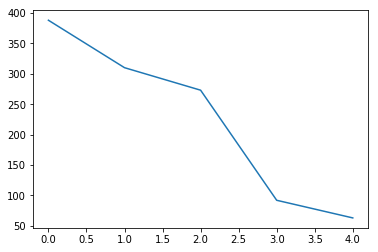

Real Percentage of gain: -110.90254512153236
Percentage of gain: -0.47307963239720047
Total gain: -533.160745711645
000000000000000000000000000000000000000000000000
Percentile:  0
[[107  93]
 [146  41]]
0.38242894056847543
Percentile:  1
[[ 47  57]
 [161  45]]
0.2967741935483871
Percentile:  2
[[ 46  22]
 [177  28]]
0.27106227106227104
Percentile:  3
[[ 9  3]
 [52 28]]
0.40217391304347827
Percentile:  4
[[ 0  0]
 [36 27]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... QCOM
151
61
11.725006748852696
0.0


In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        
        #feature sel on price
        rf = RandomForestClassifier()
        rf.fit(x[:,len(senttemp[0]):], y)
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        treshold=0.7
        optimump=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimump=order[0:u]
                break
       #adjust index shift
        optimump=optimump+len(senttemp[0])
        
        #feature sel on sentiment
        rf = RandomForestClassifier()
        rf.fit(x[:,0:len(senttemp[0])], y)
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        optimums=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimums=order[0:u]
                break
        optimumtot=np.concatenate((optimums,optimump))

        print(len(x[0]))
        x=x[:,optimumtot]
        print(len(x[0]))
        
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()